In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [4]:
model=tf.keras.models.load_model('model/trained_model.keras')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [5]:
##Single Image Visualization

In [6]:
import cv2

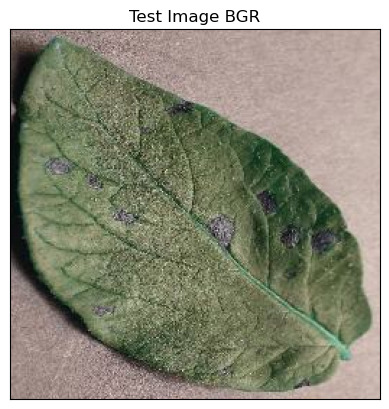

In [14]:
image_path="test/test/PotatoEarlyBlight3.JPG"
#Reading img
read_img=cv2.imread(image_path)
plt.imshow(read_img)
plt.title("Test Image BGR")
plt.xticks([])
plt.yticks([])
plt.show()



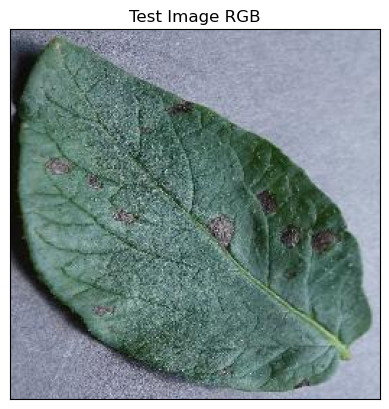

In [15]:
read_img=cv2.cvtColor(read_img,cv2.COLOR_BGR2RGB)#convert bgr to rgb
#Display Image
plt.imshow(read_img)
plt.title("Test Image RGB")
plt.xticks([])
plt.yticks([])
plt.show()

Test Model

In [9]:
img=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128 ))
input_arr=tf.keras.preprocessing.image.img_to_array(img)
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [10]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 1s 518ms/step


(array([[2.1837123e-02, 5.1672504e-07, 4.4893059e-06, 5.6398224e-02,
         6.2154186e-07, 7.1456394e-05, 3.7135555e-07, 8.9851650e-04,
         1.5327201e-05, 6.1027920e-05, 1.7437094e-04, 1.5509913e-05,
         9.3506833e-06, 3.5433848e-05, 7.2183843e-07, 2.5600600e-06,
         2.4954149e-06, 1.7611862e-07, 2.0544241e-05, 3.5874393e-06,
         4.2282468e-01, 5.7912342e-02, 5.4140162e-04, 4.5101464e-07,
         3.3773220e-04, 4.3731898e-01, 1.1163855e-03, 1.7909584e-06,
         7.8425883e-06, 2.5551123e-04, 1.0791250e-04, 1.0897986e-05,
         9.8822056e-06, 3.4667926e-07, 2.8959178e-07, 9.0161342e-07,
         3.3534128e-08, 1.6325292e-07]], dtype=float32),
 (1, 38))

In [11]:
result_idx=np.argmax(prediction)
result_idx

25

In [12]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

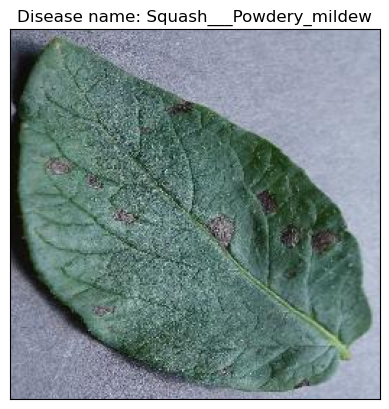

In [13]:
model_prediction=class_name[result_idx]
plt.imshow(read_img)
plt.title(f"Disease name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [6]:
y_pred=model.predict(test_set)
y_pred

550/550 [==============================] - 177s 320ms/step


array([[9.9999994e-01, 2.3905999e-10, 3.4440042e-12, ..., 2.3742929e-16,
        6.9840275e-16, 6.3319911e-16],
       [9.9995977e-01, 4.4160993e-06, 1.9104364e-10, ..., 3.2063887e-12,
        3.7497206e-12, 4.6838158e-11],
       [9.9999994e-01, 1.6369456e-15, 1.9337801e-16, ..., 2.1507147e-23,
        2.7576891e-22, 3.5052493e-21],
       ...,
       [4.3030055e-10, 2.0285128e-11, 6.6024199e-08, ..., 4.5426260e-10,
        1.5294251e-10, 9.9999487e-01],
       [1.5473032e-12, 1.2716817e-13, 1.4567557e-10, ..., 1.1889483e-11,
        2.2898440e-11, 1.0000000e+00],
       [2.8527477e-15, 2.5574193e-16, 4.2631829e-15, ..., 1.4521074e-16,
        3.3888348e-14, 1.0000000e+00]], dtype=float32)

In [7]:
y_pred.shape

(17572, 38)

In [8]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [9]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [10]:
true_categories=tf.concat([y for x,y in test_set],axis=0)

In [11]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [12]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

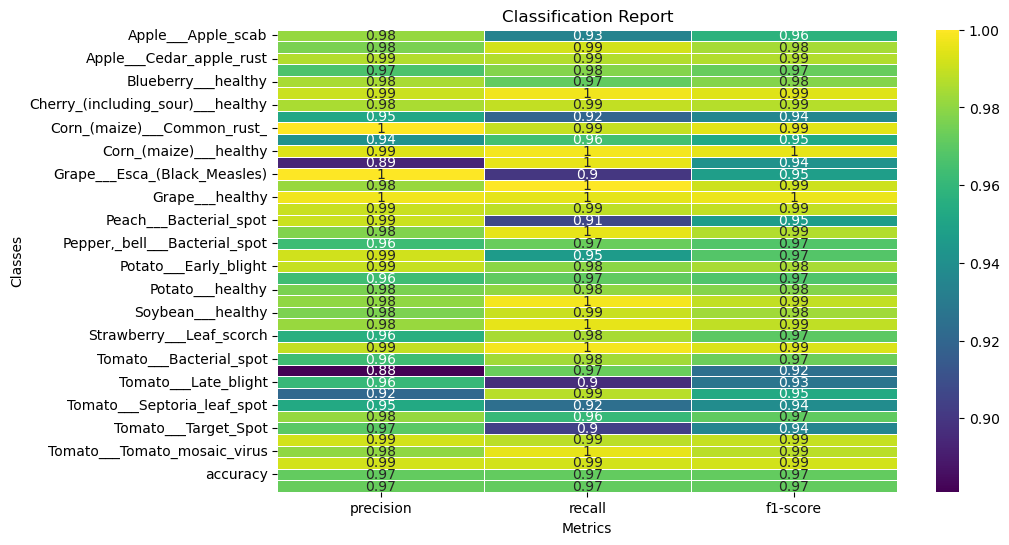

In [55]:
# Generate the classification report
report = classification_report(y_true, predicted_categories, target_names=class_name, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='viridis', linewidths=.5)

plt.title('Classification Report')
plt.ylabel('Classes')
plt.xlabel('Metrics')

plt.show()


In [18]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [17]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


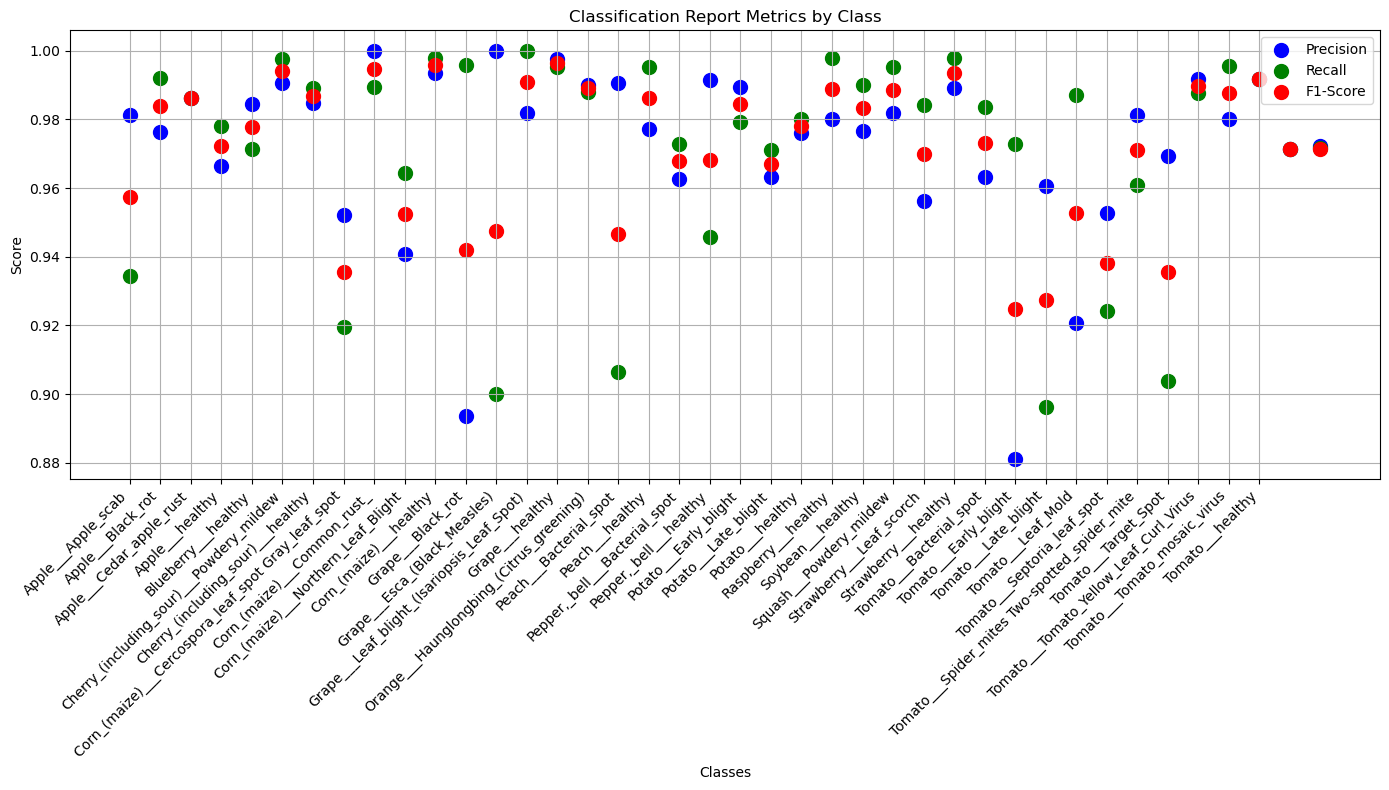

In [59]:

# Generate the classification report
report = classification_report(y_true, predicted_categories, target_names=class_name, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Extract precision, recall, and f1-score
metrics = report_df[['precision', 'recall', 'f1-score']].iloc[:-1]

# Create scatter plot
plt.figure(figsize=(14, 8))

# Precision
plt.scatter(metrics.index, metrics['precision'], color='blue', label='Precision', s=100)
# Recall
plt.scatter(metrics.index, metrics['recall'], color='green', label='Recall', s=100)
# F1-Score
plt.scatter(metrics.index, metrics['f1-score'], color='red', label='F1-Score', s=100)

# Add titles and labels
plt.title('Classification Report Metrics by Class')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(ticks=np.arange(len(class_name)), labels=class_name, rotation=45, ha='right')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


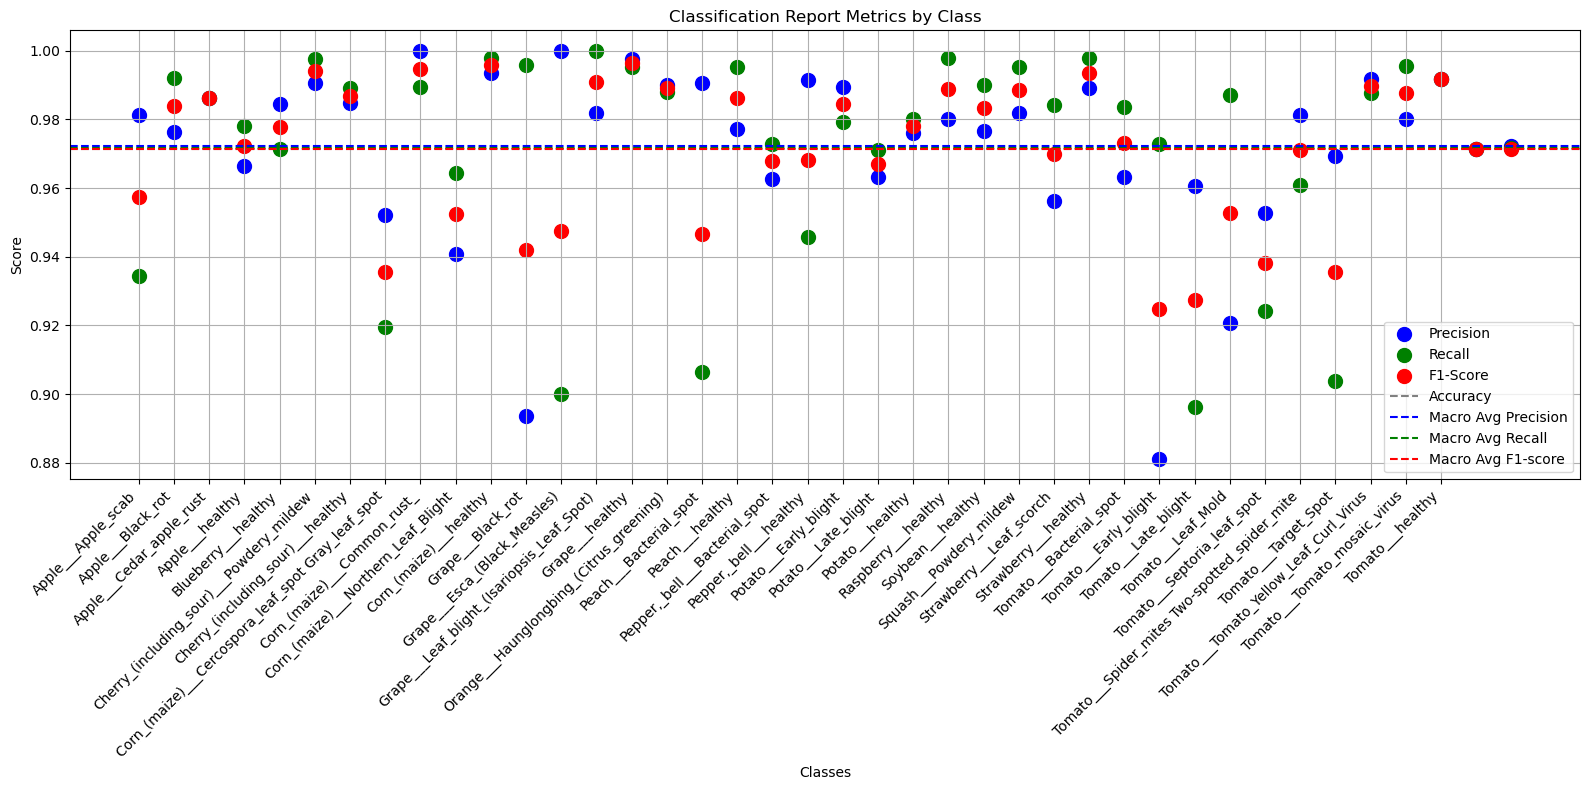

Accuracy: 0.9714887320737537
Macro Average Precision: 0.9722798566821991
Macro Average Recall: 0.9715647972017978
Macro Average F1-Score: 0.9715058427317667


In [66]:

report = classification_report(y_true, predicted_categories, target_names=class_name, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Extract precision, recall, and f1-score for each class
metrics = report_df[['precision', 'recall', 'f1-score']].iloc[:-1]

# Extract accuracy and macro averages
accuracy = report_df.loc['accuracy', 'precision']
macro_avg = {
    'precision': report_df.loc['macro avg', 'precision'],
    'recall': report_df.loc['macro avg', 'recall'],
    'f1-score': report_df.loc['macro avg', 'f1-score']
}

# Create scatter plot
plt.figure(figsize=(16, 8))

# Scatter plot for precision, recall, and f1-score
plt.scatter(metrics.index, metrics['precision'], color='blue', label='Precision', s=100)
plt.scatter(metrics.index, metrics['recall'], color='green', label='Recall', s=100)
plt.scatter(metrics.index, metrics['f1-score'], color='red', label='F1-Score', s=100)

# Add accuracy and macro averages as annotations
plt.axhline(y=accuracy, color='gray', linestyle='--', label='Accuracy')
for metric, color in zip(['precision', 'recall', 'f1-score'], ['blue', 'green', 'red']):
    plt.axhline(y=macro_avg[metric], color=color, linestyle='--', label=f'Macro Avg {metric.capitalize()}')

# Add titles and labels
plt.title('Classification Report Metrics by Class')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(ticks=np.arange(len(class_name)), labels=class_name, rotation=45, ha='right')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print accuracy and macro averages
print(f"Accuracy: {accuracy}")
print(f"Macro Average Precision: {macro_avg['precision']}")
print(f"Macro Average Recall: {macro_avg['recall']}")
print(f"Macro Average F1-Score: {macro_avg['f1-score']}")


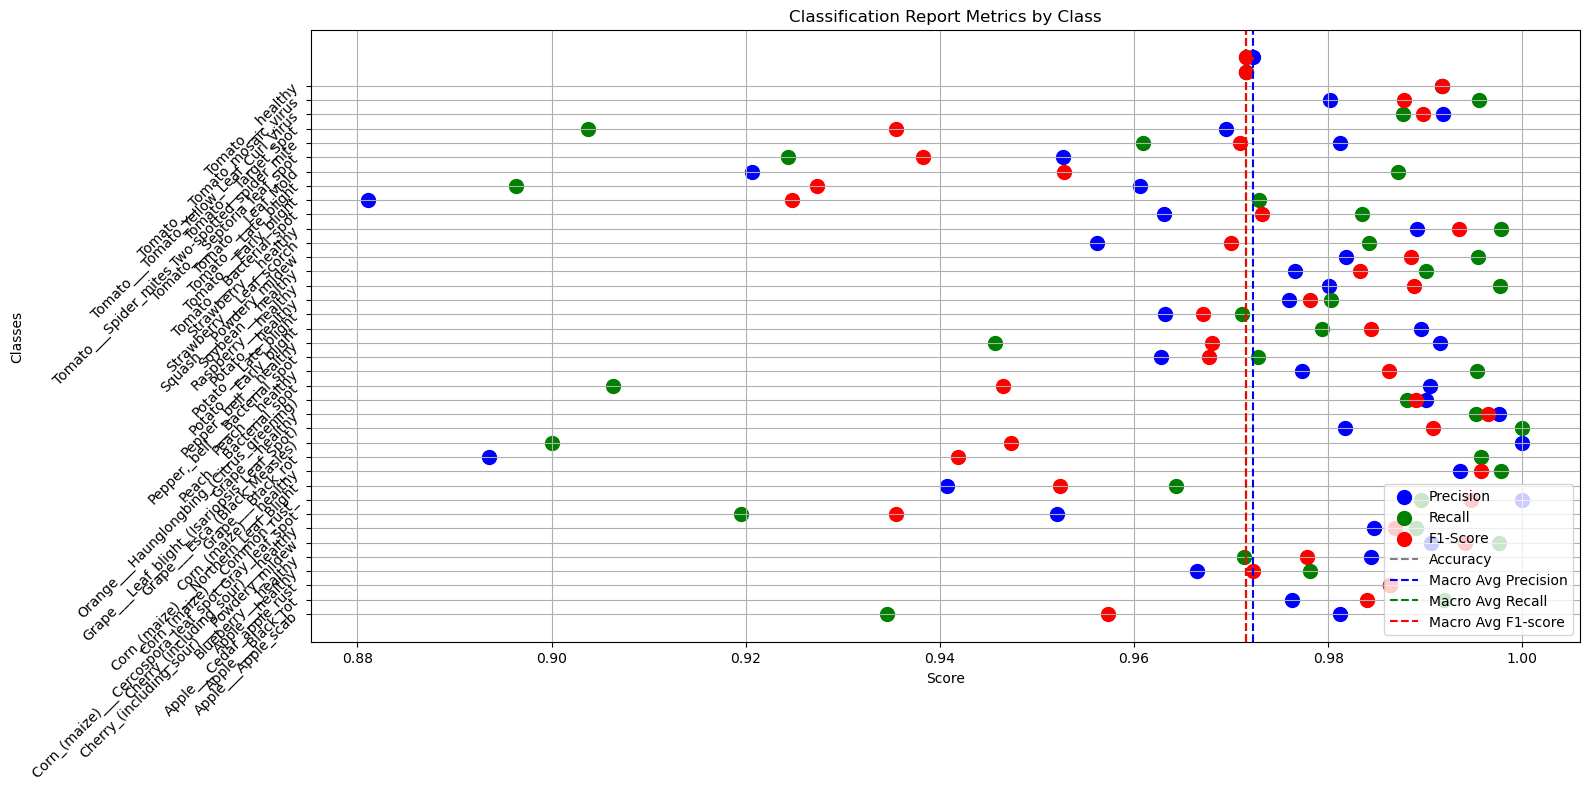

Accuracy: 0.9714887320737537
Macro Average Precision: 0.9722798566821991
Macro Average Recall: 0.9715647972017978
Macro Average F1-Score: 0.9715058427317667


In [19]:

# Generate classification report
report = classification_report(y_true, predicted_categories, target_names=class_name, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Extract precision, recall, and f1-score for each class
metrics = report_df[['precision', 'recall', 'f1-score']].iloc[:-1]

# Extract accuracy and macro averages
accuracy = report_df.loc['accuracy', 'precision']
macro_avg = {
    'precision': report_df.loc['macro avg', 'precision'],
    'recall': report_df.loc['macro avg', 'recall'],
    'f1-score': report_df.loc['macro avg', 'f1-score']
}

# Create scatter plot
plt.figure(figsize=(16, 8))

# Scatter plot for precision, recall, and f1-score
plt.scatter(metrics['precision'], metrics.index, color='blue', label='Precision', s=100)
plt.scatter(metrics['recall'], metrics.index, color='green', label='Recall', s=100)
plt.scatter(metrics['f1-score'], metrics.index, color='red', label='F1-Score', s=100)

# Add accuracy and macro averages as annotations
plt.axvline(x=accuracy, color='gray', linestyle='--', label='Accuracy')
for metric, color in zip(['precision', 'recall', 'f1-score'], ['blue', 'green', 'red']):
    plt.axvline(x=macro_avg[metric], color=color, linestyle='--', label=f'Macro Avg {metric.capitalize()}')

# Add titles and labels
plt.title('Classification Report Metrics by Class')
plt.ylabel('Classes')
plt.xlabel('Score')
plt.yticks(ticks=np.arange(len(class_name)), labels=class_name, rotation=45, ha='right')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print accuracy and macro averages
print(f"Accuracy: {accuracy}")
print(f"Macro Average Precision: {macro_avg['precision']}")
print(f"Macro Average Recall: {macro_avg['recall']}")
print(f"Macro Average F1-Score: {macro_avg['f1-score']}")
